In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\R.R. Dharun raagav\Desktop\Shanmuga priya projects Ml project\FAOSTAT_data.csv")
df.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN


In [5]:
Missing_values = df.isnull().sum()
print (Missing_values>0)

Domain Code         False
Domain              False
Area Code (M49)     False
Area                False
Element Code        False
Element             False
Item Code (CPC)      True
Item                False
Year Code           False
Year                False
Unit                 True
Value                True
Flag                 True
Flag Description     True
Note                 True
dtype: bool


In [6]:
unit_mapping = {
    "Area harvested":"ha",
    "Yield":"kg/ha",
    "Production":"t"
}
df["Unit"] = df["Unit"].fillna(df["Element"].map(unit_mapping))

In [7]:
print(df["Unit"].isnull().sum())

0


In [8]:
df["Item Code (CPC)"] = df["Item Code (CPC)"].ffill()
print(df["Item Code (CPC)"].isnull().sum())

0


In [9]:
df["Flag"] = df["Flag"].ffill()
print(df["Flag"].isnull().sum())


0


In [10]:

unique_flags = df[["Flag", "Flag Description"]].drop_duplicates()

print(unique_flags)


     Flag                                   Flag Description
0       A                                    Official figure
15      E                                    Estimated value
57      I                                      Imputed value
77      X            Figure from international organizations
180     I                                                NaN
235     E                                                NaN
237     A                                                NaN
1271    M  Missing value (data cannot exist, not applicable)


In [11]:
flag_mapping = df[["Flag", "Flag Description"]].dropna().drop_duplicates().set_index("Flag")["Flag Description"].to_dict()

print(flag_mapping)  # Check the dictionary

{'A': 'Official figure', 'E': 'Estimated value', 'I': 'Imputed value', 'X': 'Figure from international organizations', 'M': 'Missing value (data cannot exist, not applicable)'}


In [12]:
df["Flag Description"] = df["Flag Description"].fillna(df["Flag"].map(flag_mapping))
print(df["Flag Description"].isnull().sum())

0


In [13]:
df["Note"] = df["Note"].fillna("No Note")
print(df["Note"].isnull().sum())

0


In [14]:
print(df["Value"].describe())  # Summary statistics
print(df["Value"].isnull().sum())  # Count of missing values


count    2.181300e+05
mean     8.984848e+05
std      1.201902e+07
min      0.000000e+00
25%      9.370000e+02
50%      7.228200e+03
75%      5.135000e+04
max      7.825858e+08
Name: Value, dtype: float64
6517


In [15]:
df["Value"] = df.groupby(["Area", "Item", "Year"])["Value"].transform(lambda x: x if x.isnull().all() else x.fillna(x.median()))


In [16]:
nan_groups = df.groupby(["Area", "Item", "Year"])["Value"].apply(lambda x: x.isnull().all()).sum()
print(f"Groups with only NaN values: {nan_groups}")

Groups with only NaN values: 3503


In [17]:
import pandas as pd
import numpy as np

# Convert Value column to numeric (ensure it's not object type)
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

# Step 1: Fill missing values using group-wise median
df["Value"] = df.groupby(["Area", "Item", "Year"])["Value"].transform(
    lambda x: x.fillna(x.median()) if not x.isnull().all() else np.nan
)

# Step 2: Fill remaining NaNs using the median of that Item across all areas and years
df["Value"] = df.groupby(["Item"])["Value"].transform(lambda x: x.fillna(x.median()))

# Step 3: Fill remaining NaNs with overall median
df["Value"] = df["Value"].fillna(df["Value"].median())


# Final check: Print the number of remaining NaNs
print(f"Remaining missing values: {df['Value'].isnull().sum()}")

Remaining missing values: 0


C:\Users\R.R. Dharun raagav\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [18]:
df.to_csv("Preprocessed_crop_production_data.csv", index=False)
print("Preprocessed dataset saved successfully!")

Preprocessed dataset saved successfully!


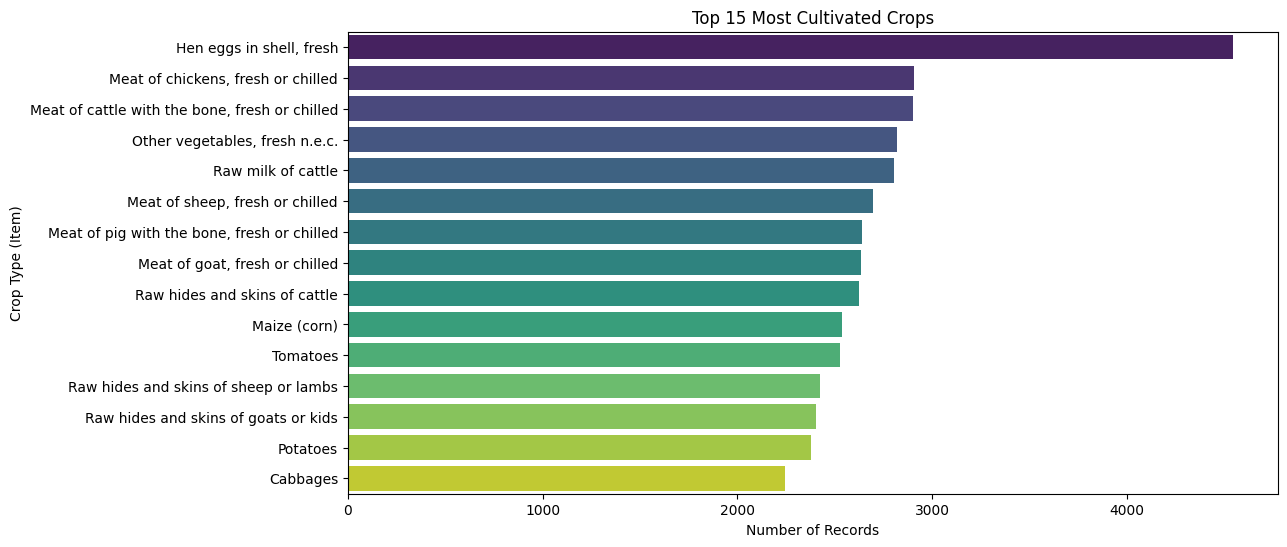

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each crop
plt.figure(figsize=(12, 6))
top_crops = df["Item"].value_counts().nlargest(15)  # Top 15 most grown crops

sns.barplot(x=top_crops.values, y=top_crops.index, hue=top_crops.index, palette="viridis", legend=False)
plt.xlabel("Number of Records")
plt.ylabel("Crop Type (Item)")
plt.title("Top 15 Most Cultivated Crops")
plt.show()


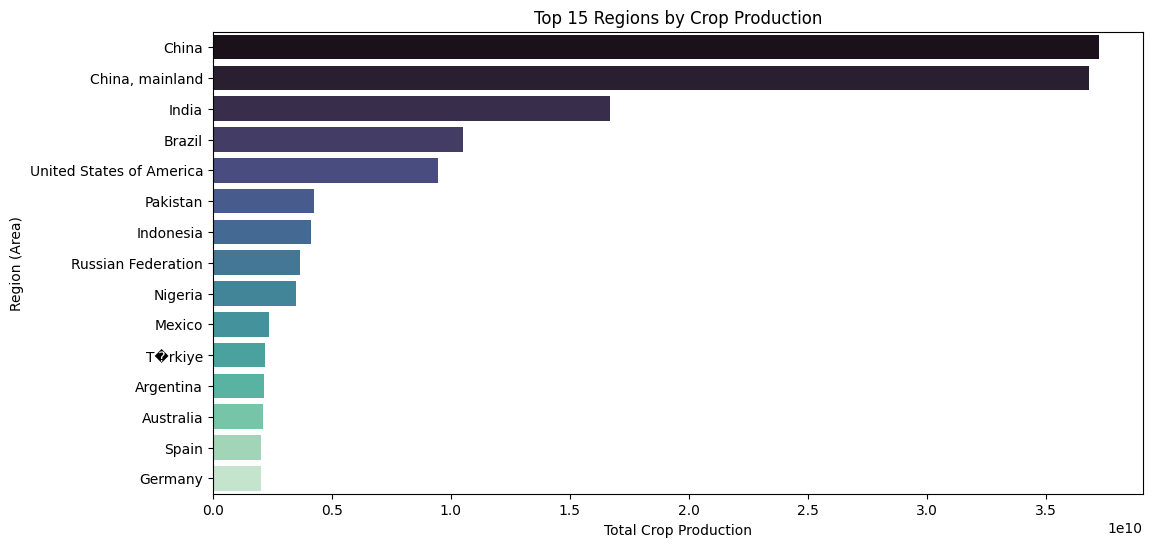

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total production for each region
region_production = df.groupby("Area")["Value"].sum()

# Plot the top 15 regions by total crop production
plt.figure(figsize=(12, 6))
sns.barplot(
    x=region_production.nlargest(15).values, 
    y=region_production.nlargest(15).index, 
    hue=region_production.nlargest(15).index,  # Assigning hue to avoid warning
    palette="mako",
    legend=False  # Removing unnecessary legend
)

plt.xlabel("Total Crop Production")
plt.ylabel("Region (Area)")
plt.title("Top 15 Regions by Crop Production")
plt.show()



In [21]:
df["Year"] = df["Year"].astype(int)
print(df["Year"].unique())


[2019 2020 2021 2022 2023]


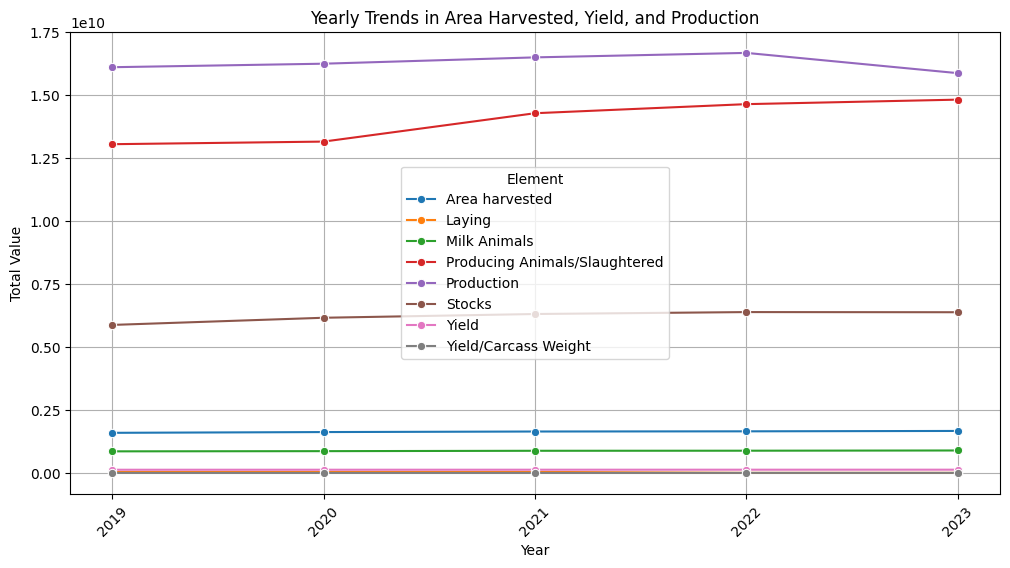

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating the data by Year and Element to get yearly trends
yearly_trends = df.groupby(["Year", "Element"])["Value"].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x="Year", y="Value", hue="Element", marker="o")
plt.title("Yearly Trends in Area Harvested, Yield, and Production")
plt.xlabel("Year")
plt.ylabel("Total Value")

# Ensure x-axis shows only whole numbers
plt.xticks(df["Year"].unique(), rotation=45)  


plt.legend(title="Element")
plt.grid(True)
plt.show()


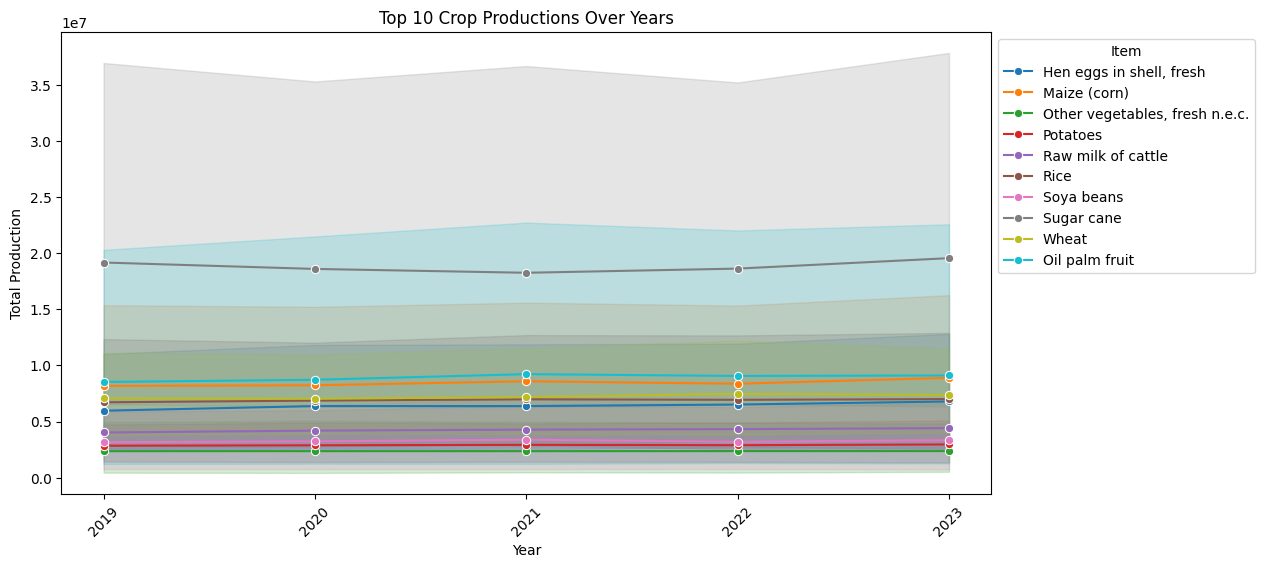

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Year to integer format
df["Year"] = df["Year"].astype(int)

# Filter for Production data
df_production = df[df["Element"] == "Production"]

# Get top 10 crops by total production
top_crops = df_production.groupby("Item")["Value"].sum().nlargest(10).index
df_top = df_production[df_production["Item"].isin(top_crops)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top, x="Year", y="Value", hue="Item", marker="o")

plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title("Top 10 Crop Productions Over Years")

# Ensure x-axis shows only whole numbers
plt.xticks(df["Year"].unique(), rotation=45)  

plt.legend(title="Item", bbox_to_anchor=(1, 1))
plt.show()



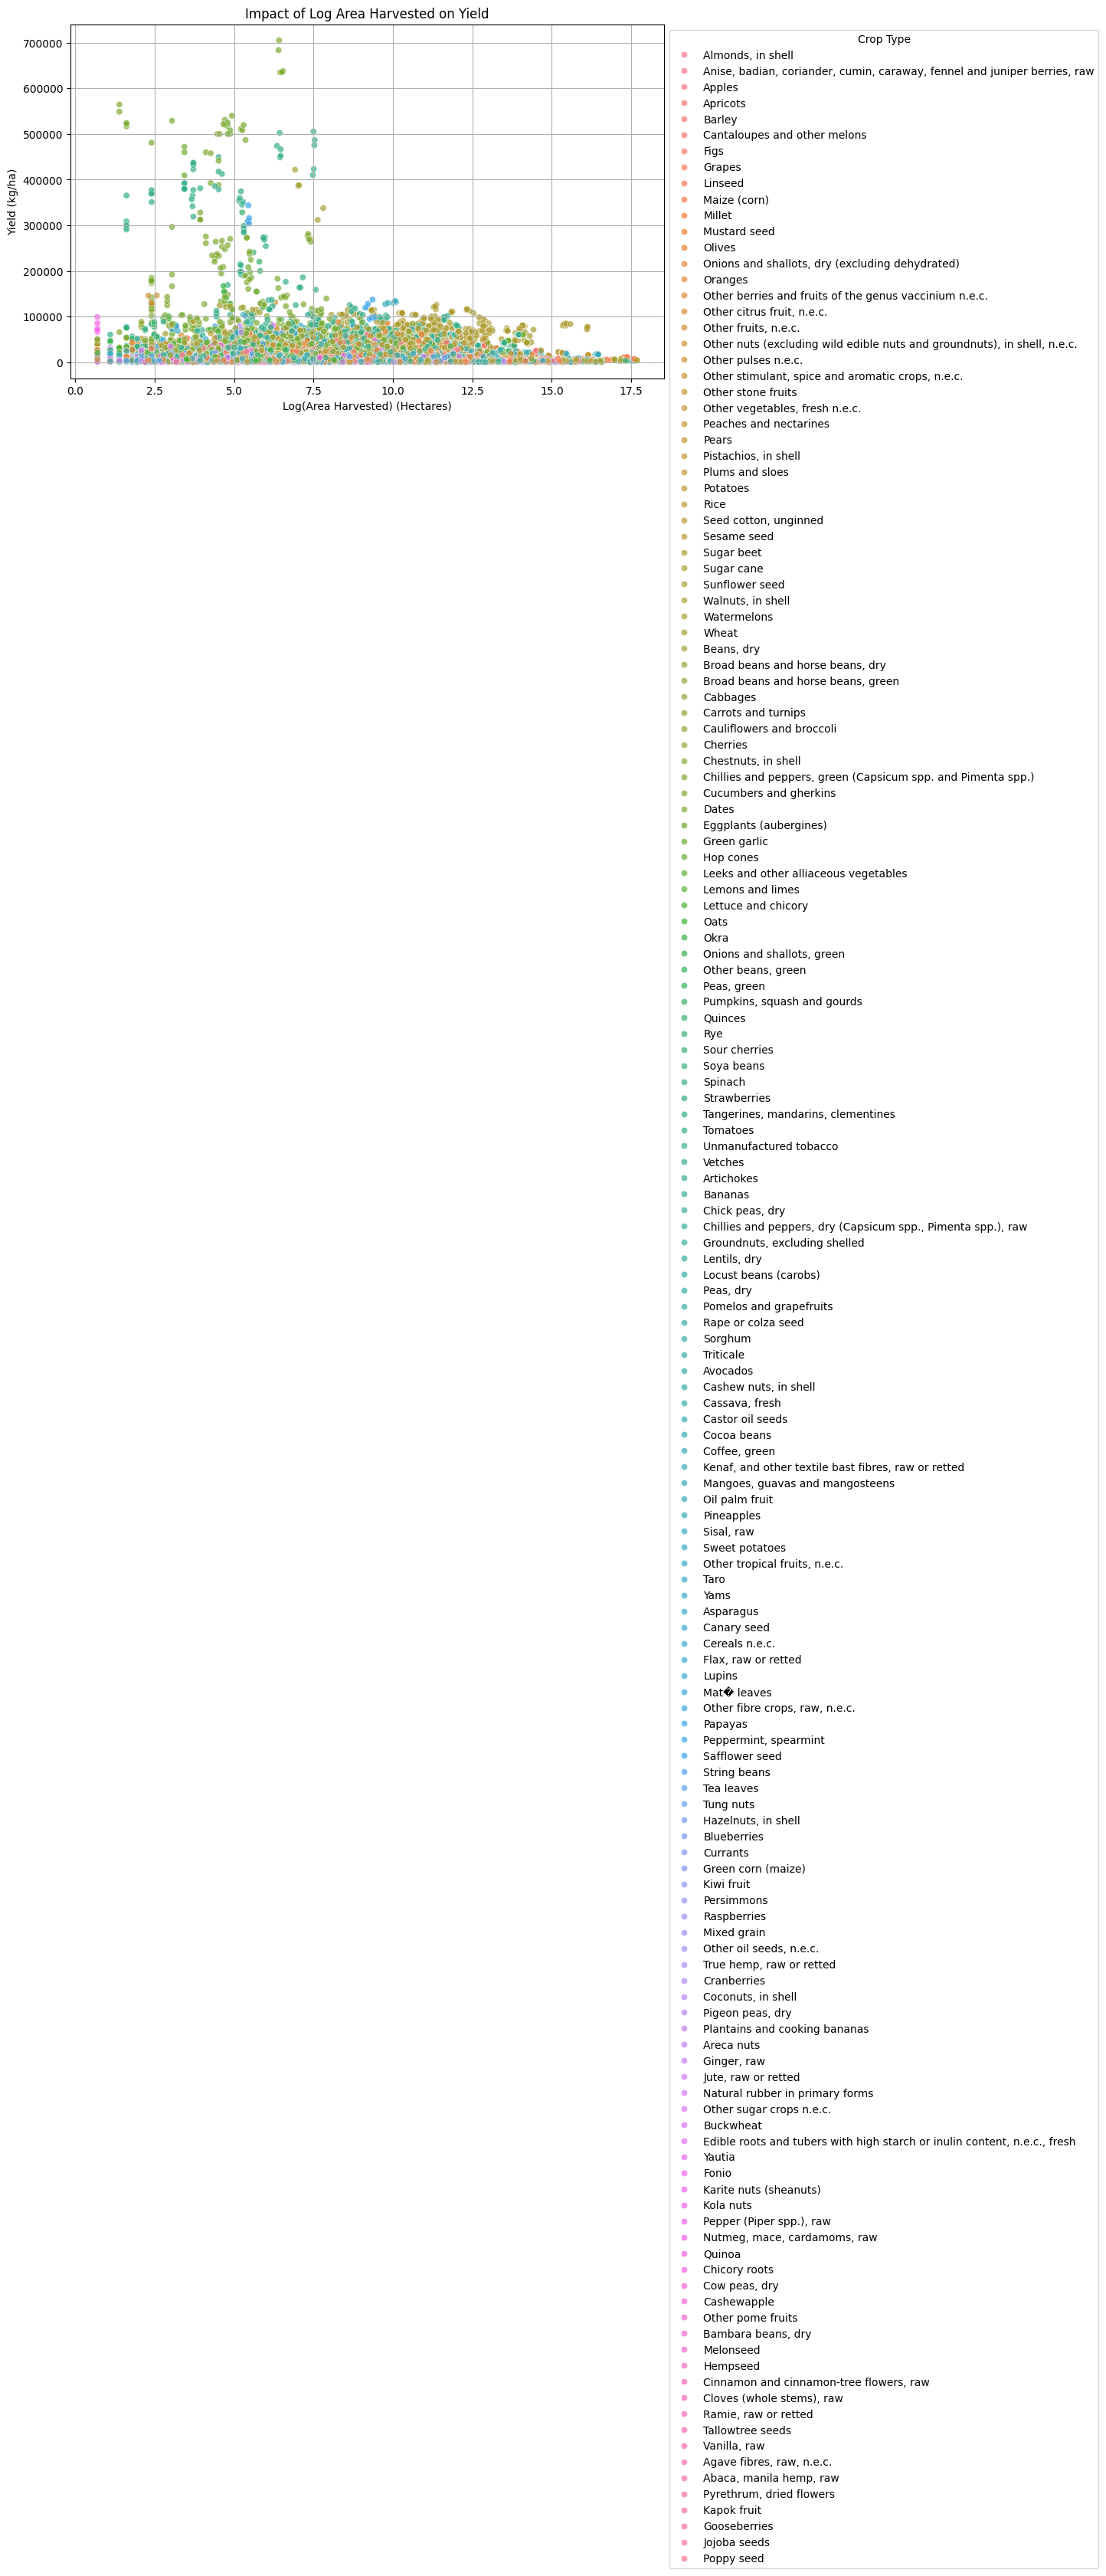

In [29]:
import numpy as np

df_pivot["Log_Area_Harvested"] = np.log1p(df_pivot["Area_Harvested"])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pivot, x="Log_Area_Harvested", y="Yield", hue="Item", alpha=0.7)
plt.xlabel("Log(Area Harvested) (Hectares)")
plt.ylabel("Yield (kg/ha)")
plt.title("Impact of Log Area Harvested on Yield")
plt.legend(title="Crop Type", bbox_to_anchor=(1, 1))
plt.grid()

plt.show()


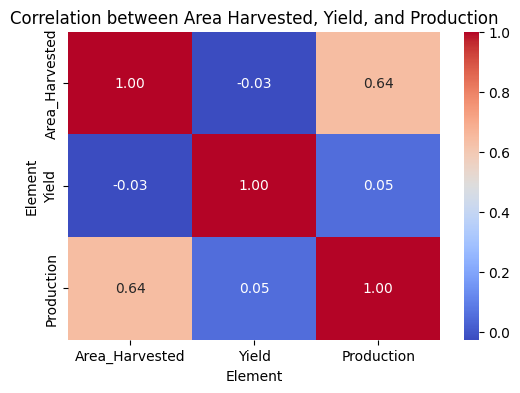

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns
corr_matrix = df_pivot[["Area_Harvested", "Yield", "Production"]].corr()

# Plot the correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Area Harvested, Yield, and Production")
plt.show()


C:\Users\R.R. Dharun raagav\AppData\Local\Temp\ipykernel_22608\3667268177.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='Item', data=crop_yield.head(10), palette='Greens_r')


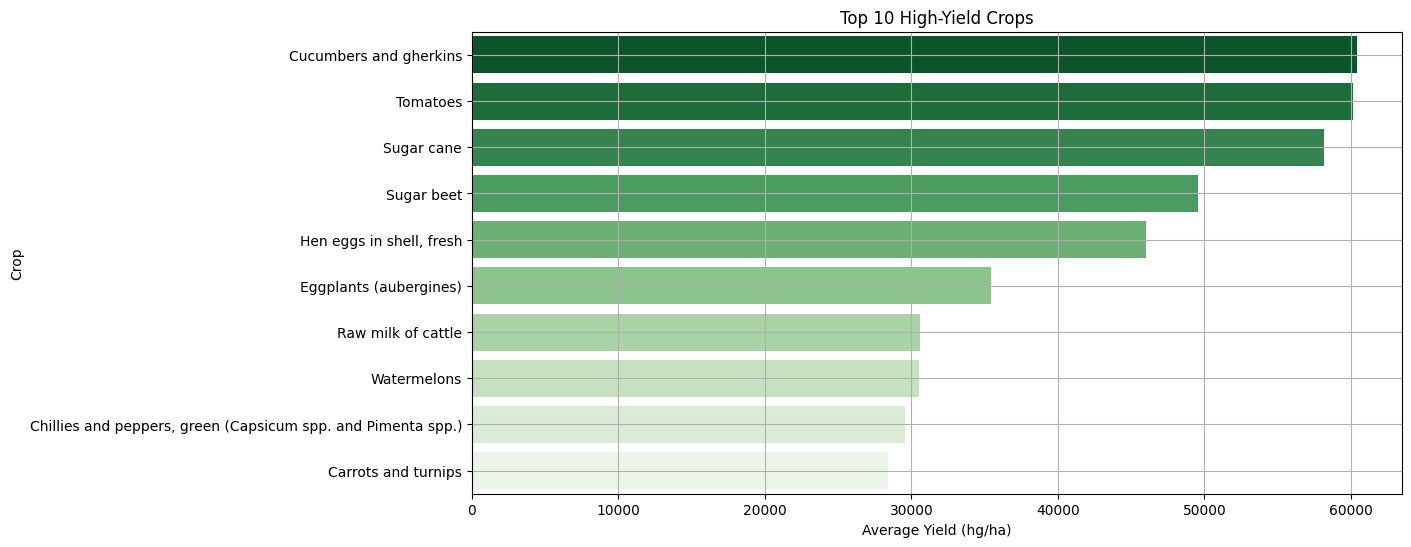

C:\Users\R.R. Dharun raagav\AppData\Local\Temp\ipykernel_22608\3667268177.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='Item', data=crop_yield.tail(10), palette='Reds_r')


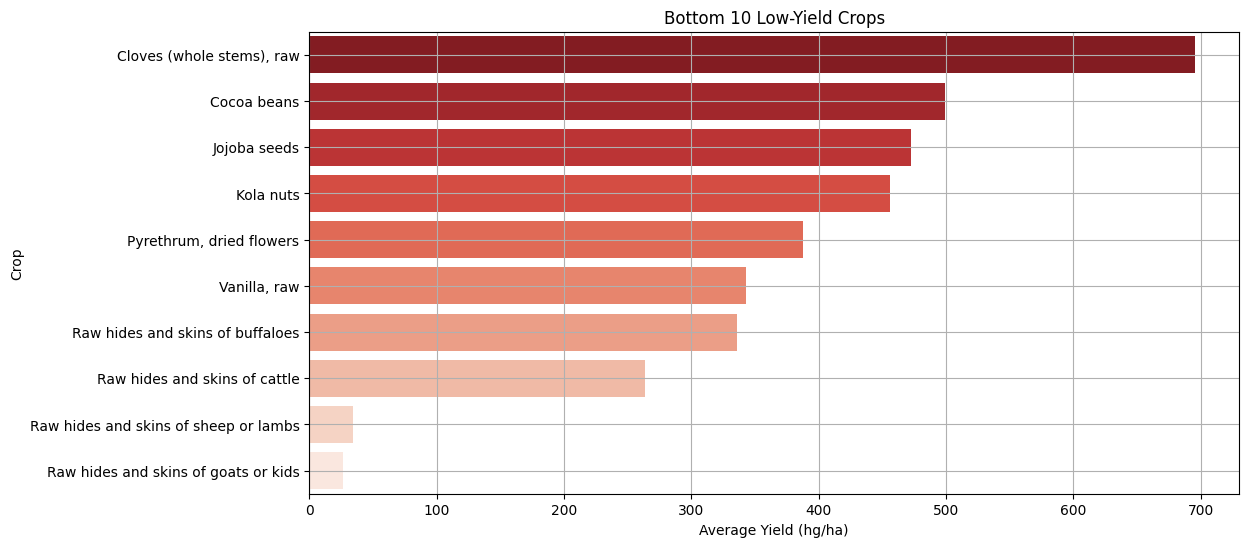

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only rows where Element is 'Yield'
yield_df = df[df['Element'] == 'Yield']

# Grouping by crop type (Item) and calculating average yield
crop_yield = yield_df.groupby('Item')['Value'].agg(['mean', 'std']).reset_index()
crop_yield = crop_yield.sort_values(by='mean', ascending=False)

# 📊 Bar Chart: Top 10 High-Yield Crops
plt.figure(figsize=(12, 6))
sns.barplot(x='mean', y='Item', data=crop_yield.head(10), palette='Greens_r')
plt.xlabel('Average Yield (hg/ha)')
plt.ylabel('Crop')
plt.title('Top 10 High-Yield Crops')
plt.grid()
plt.show()

# 📊 Bar Chart: Bottom 10 Low-Yield Crops
plt.figure(figsize=(12, 6))
sns.barplot(x='mean', y='Item', data=crop_yield.tail(10), palette='Reds_r')
plt.xlabel('Average Yield (hg/ha)')
plt.ylabel('Crop')
plt.title('Bottom 10 Low-Yield Crops')
plt.grid()
plt.show()


Available Columns: Index(['Year', 'Area', 'Item', 'Element', 'Value'], dtype='object')
Unique Elements: ['Area harvested' 'Production' 'Yield' 'Stocks'
 'Producing Animals/Slaughtered' 'Laying' 'Yield/Carcass Weight'
 'Milk Animals']
Negative Productivity Ratio Rows: Empty DataFrame
Columns: [Year, Area, Item, Area_Harvested, Laying, Milk Animals, Producing Animals/Slaughtered, Production, Stocks, Yield, Yield/Carcass Weight, Productivity_Ratio]
Index: []


C:\Users\R.R. Dharun raagav\AppData\Local\Temp\ipykernel_22564\1271040543.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


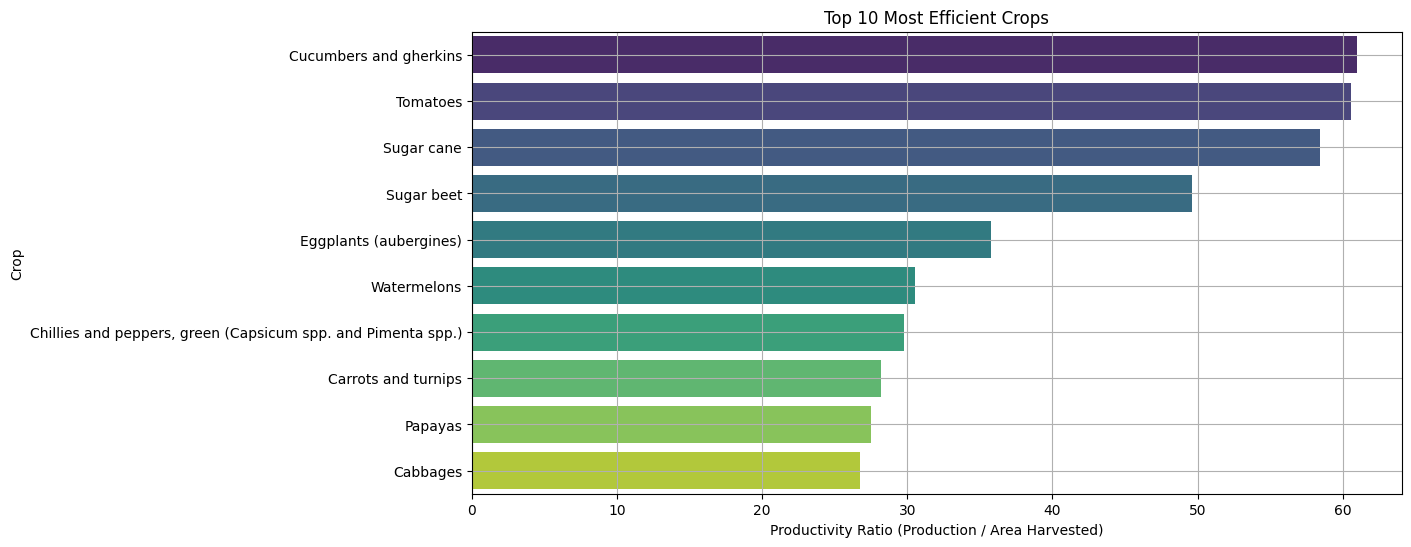

C:\Users\R.R. Dharun raagav\AppData\Local\Temp\ipykernel_22564\1271040543.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


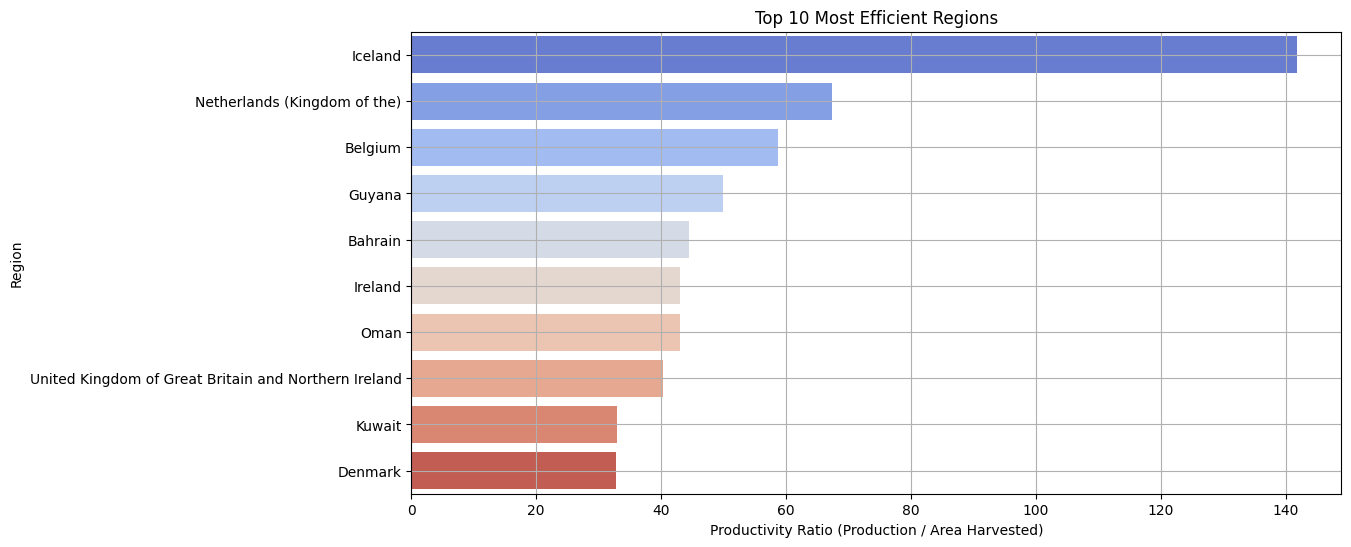

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check available columns
print("Available Columns:", df.columns)

# Check unique values in 'Element' column
print("Unique Elements:", df["Element"].unique())

# Pivot table to separate Yield, Production, and Area Harvested
df_pivot = df.pivot_table(index=["Year", "Area", "Item"], 
                          columns="Element", 
                          values="Value", 
                          aggfunc="sum").reset_index()

# Renaming columns for clarity
df_pivot = df_pivot.rename(columns={
    "Area harvested": "Area_Harvested",
    "Production": "Production",
    "Yield": "Yield"
})

# Drop rows where Area_Harvested or Production is zero or missing
df_pivot = df_pivot.dropna(subset=["Area_Harvested", "Production", "Yield"])

# Ensure no zero values before division
df_pivot = df_pivot[(df_pivot["Area_Harvested"] > 0) & (df_pivot["Production"] > 0)]

# ✅ Fix Productivity Ratio Calculation
df_pivot["Productivity_Ratio"] = df_pivot["Production"] / df_pivot["Area_Harvested"]

# Debug - Check if any negative values
print("Negative Productivity Ratio Rows:", df_pivot[df_pivot["Productivity_Ratio"] < 0])

# ✅ **Top 10 Most Efficient Crops**
crop_productivity = df_pivot.groupby("Item")["Productivity_Ratio"].mean().reset_index()
crop_productivity = crop_productivity.sort_values(by="Productivity_Ratio", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Productivity_Ratio", y="Item", data=crop_productivity.head(10), hue="Item", palette="viridis")
plt.xlabel("Productivity Ratio (Production / Area Harvested)")
plt.ylabel("Crop")
plt.title("Top 10 Most Efficient Crops")
plt.legend().set_visible(False)
plt.grid()
plt.show()

# ✅ **Top 10 Most Efficient Regions**
region_productivity = df_pivot.groupby("Area")["Productivity_Ratio"].mean().reset_index()
region_productivity = region_productivity.sort_values(by="Productivity_Ratio", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Productivity_Ratio", y="Area", data=region_productivity.head(10), hue="Area", palette="coolwarm")
plt.xlabel("Productivity Ratio (Production / Area Harvested)")
plt.ylabel("Region")
plt.title("Top 10 Most Efficient Regions")
plt.legend().set_visible(False)
plt.grid()
plt.show()


Yield Outliers (After Filtering): 395
Production Outliers (After Filtering): 239


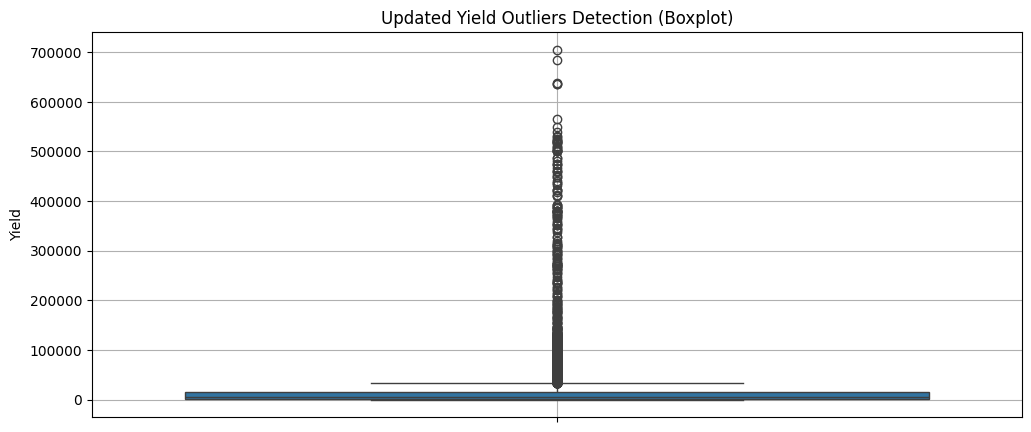

In [37]:
# Filter dataset for crop-related elements
crop_elements = ["Area harvested", "Production", "Yield"]
df_crops = df[df["Element"].isin(crop_elements)]

# Pivot for correct mapping
df_pivot = df_crops.pivot_table(index=["Year", "Area", "Item"], 
                                columns="Element", 
                                values="Value", 
                                aggfunc="sum").reset_index()

# Rename columns
df_pivot = df_pivot.rename(columns={
    "Area harvested": "Area_Harvested",
    "Production": "Production",
    "Yield": "Yield"
})

# Drop NaN values
df_pivot = df_pivot.dropna(subset=["Production", "Yield", "Area_Harvested"])

# Filter valid values (positive numbers only)
df_pivot = df_pivot[(df_pivot["Production"] > 0) & (df_pivot["Yield"] > 0) & (df_pivot["Area_Harvested"] > 0)]

# Recalculate Z-scores after filtering
df_pivot["Yield_Zscore"] = zscore(df_pivot["Yield"])
df_pivot["Production_Zscore"] = zscore(df_pivot["Production"])

# Define threshold for outliers (Z-score > 3 or < -3)
outliers_yield = df_pivot[np.abs(df_pivot["Yield_Zscore"]) > 3]
outliers_production = df_pivot[np.abs(df_pivot["Production_Zscore"]) > 3]

print(f"Yield Outliers (After Filtering): {len(outliers_yield)}")
print(f"Production Outliers (After Filtering): {len(outliers_production)}")

# Visualize updated outliers
plt.figure(figsize=(12, 5))
sns.boxplot(y=df_pivot["Yield"])
plt.title("Updated Yield Outliers Detection (Boxplot)")
plt.ylabel("Yield")
plt.grid()
plt.show()


In [38]:
# Count outliers per crop
outliers_yield_crops = outliers_yield["Item"].value_counts().head(10)
outliers_production_crops = outliers_production["Item"].value_counts().head(10)

print("🔹 Top Crops with Yield Outliers:\n", outliers_yield_crops)
print("🔹 Top Crops with Production Outliers:\n", outliers_production_crops)


🔹 Top Crops with Yield Outliers:
 Item
Tomatoes                                                        109
Cucumbers and gherkins                                           99
Sugar cane                                                       58
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)     42
Eggplants (aubergines)                                           20
Watermelons                                                      17
Papayas                                                          15
Sugar beet                                                        5
Okra                                                              5
Pumpkins, squash and gourds                                       5
Name: count, dtype: int64
🔹 Top Crops with Production Outliers:
 Item
Sugar cane                        35
Rice                              30
Wheat                             27
Maize (corn)                      26
Potatoes                          15
Soya beans                

In [62]:
# Count outliers per region
outliers_yield_regions = outliers_yield["Area"].value_counts().head(10)
outliers_production_regions = outliers_production["Area"].value_counts().head(10)

print("🔹 Top Regions with Yield Outliers:\n", outliers_yield_regions)
print("🔹 Top Regions with Production Outliers:\n", outliers_production_regions)


🔹 Top Regions with Yield Outliers:
 Area
Guyana                                                  37
Belgium                                                 20
Netherlands (Kingdom of the)                            20
Austria                                                 19
Germany                                                 15
United Kingdom of Great Britain and Northern Ireland    15
Finland                                                 14
Iceland                                                 10
Indonesia                                               10
Dominican Republic                                      10
Name: count, dtype: int64
🔹 Top Regions with Production Outliers:
 Area
China                       55
China, mainland             55
India                       24
Brazil                      15
United States of America    15
Nigeria                     10
Indonesia                   10
Russian Federation           9
Argentina                    9
Bangladesh        

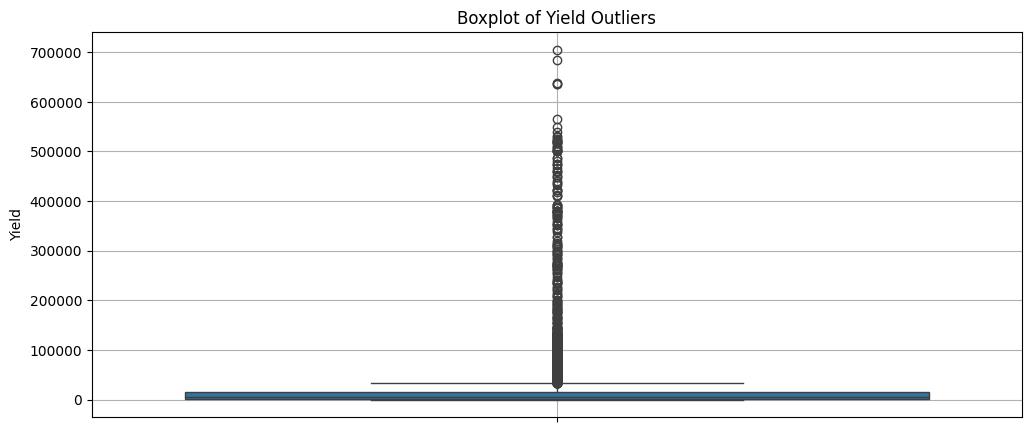

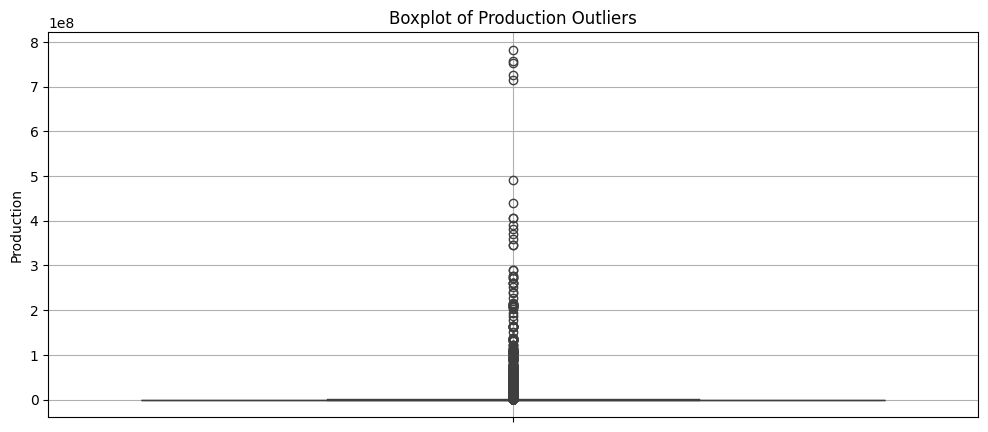

In [33]:
plt.figure(figsize=(12, 5))
sns.boxplot(y=df_pivot["Yield"])
plt.title("Boxplot of Yield Outliers")
plt.ylabel("Yield")
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(y=df_pivot["Production"])
plt.title("Boxplot of Production Outliers")
plt.ylabel("Production")
plt.grid()
plt.show()


In [34]:
df['Element'].unique()
# If analyzing Yield anomalies
df_yield = df[df['Element'] == 'Yield']

# If analyzing Production anomalies
df_production = df[df['Element'] == 'Production']


In [35]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect anomalies for Yield
yield_anomalies = detect_outliers_iqr(df_yield, 'Value')

# Detect anomalies for Production
production_anomalies = detect_outliers_iqr(df_production, 'Value')


In [36]:
from scipy.stats import zscore

df_yield = df[df['Element'] == 'Yield'].copy()
df_production = df[df['Element'] == 'Production'].copy()

from scipy.stats import zscore

df_yield.loc[:, 'z_score'] = zscore(df_yield['Value'])
df_production.loc[:, 'z_score'] = zscore(df_production['Value'])



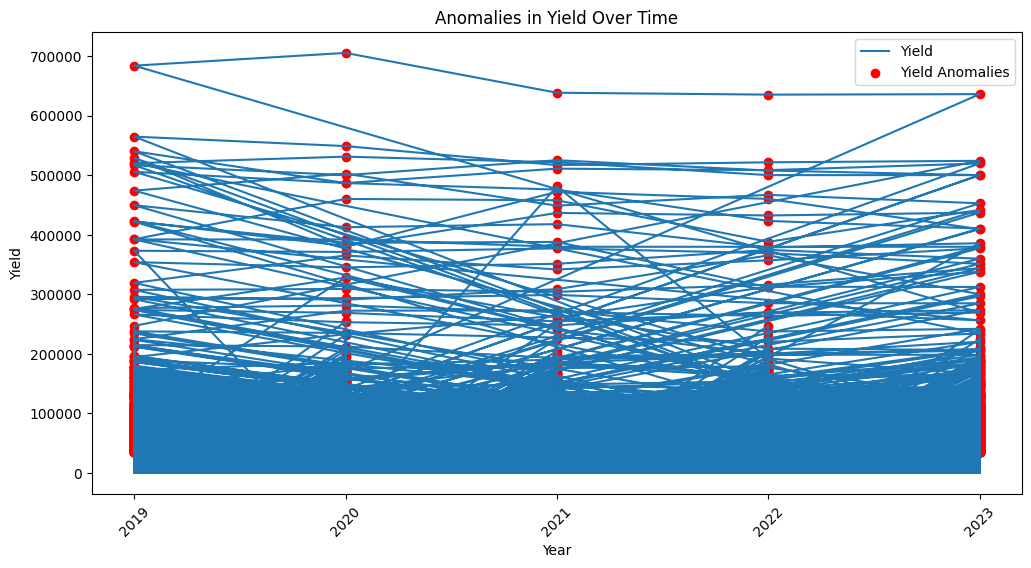

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_yield['Year'].astype(int), df_yield['Value'], label='Yield')
plt.scatter(yield_anomalies['Year'].astype(int), yield_anomalies['Value'], color='red', label='Yield Anomalies')
plt.xlabel("Year")
plt.ylabel("Yield")
plt.legend()
plt.title("Anomalies in Yield Over Time")
plt.xticks(df["Year"].unique() , rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()



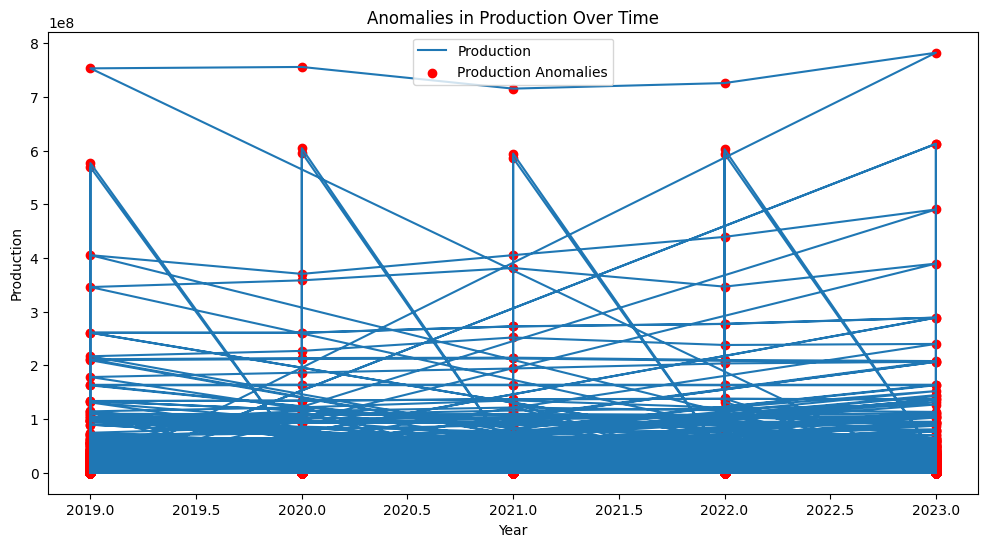

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df_production['Year'], df_production['Value'], label='Production')
plt.scatter(production_anomalies['Year'], production_anomalies['Value'], color='red', label='Production Anomalies')
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.title("Anomalies in Production Over Time")
plt.show()


In [41]:
# Ensure Year column is integer before merging
df_yield['Year'] = df_yield['Year'].astype(int)
df_production['Year'] = df_production['Year'].astype(int)

# Check if climate_data and policy_data exist
if 'climate_data' in locals() and 'policy_data' in locals():
    df_yield = df_yield.merge(climate_data, on='Year', how='left')
    df_production = df_production.merge(policy_data, on='Year', how='left')
else:
    print("climate_data or policy_data is not defined!")


climate_data or policy_data is not defined!


In [42]:
import numpy as np

years = list(range(2000, 2025))

climate_data = pd.DataFrame({
    'Year': years,
    'Temperature': np.random.uniform(15, 35, len(years)),  # Simulated temperature data
    'Rainfall': np.random.uniform(500, 2000, len(years))   # Simulated rainfall data
})

policy_data = pd.DataFrame({
    'Year': years,
    'Subsidy': np.random.uniform(1000, 5000, len(years)),  # Simulated government subsidies
    'Regulations': np.random.choice(['Low', 'Medium', 'High'], len(years))  # Policy levels
})

print(climate_data.head())  # Check if data is created
print(policy_data.head())


   Year  Temperature     Rainfall
0  2000    20.620144  1378.476484
1  2001    23.147504   608.615102
2  2002    26.351241   803.031121
3  2003    26.994893  1352.321582
4  2004    34.630837  1548.173408
   Year      Subsidy Regulations
0  2000  4279.522767      Medium
1  2001  3458.915342        High
2  2002  1608.298627      Medium
3  2003  1409.008979      Medium
4  2004  1195.433259        High


In [43]:
df_yield['Year'] = df_yield['Year'].astype(int)
df_production['Year'] = df_production['Year'].astype(int)

df_yield = df_yield.merge(climate_data, on='Year', how='left')
df_production = df_production.merge(policy_data, on='Year', how='left')

print(df_yield.head())  # Check if merge worked
print(df_production.head())


  Domain Code                        Domain  Area Code (M49)         Area  \
0         QCL  Crops and livestock products                4  Afghanistan   
1         QCL  Crops and livestock products                4  Afghanistan   
2         QCL  Crops and livestock products                4  Afghanistan   
3         QCL  Crops and livestock products                4  Afghanistan   
4         QCL  Crops and livestock products                4  Afghanistan   

   Element Code Element Item Code (CPC)               Item  Year Code  Year  \
0          5412   Yield            1371  Almonds, in shell       2019  2019   
1          5412   Yield            1371  Almonds, in shell       2020  2020   
2          5412   Yield            1371  Almonds, in shell       2021  2021   
3          5412   Yield            1371  Almonds, in shell       2022  2022   
4          5412   Yield            1371  Almonds, in shell       2023  2023   

    Unit   Value Flag Flag Description     Note   z_score  Tem

In [44]:
print(df_yield[['Value', 'Temperature', 'Rainfall']].corr())  # Climate impact on yield
print(df_production[['Value', 'Subsidy']].corr())  # Policy impact on production


                Value  Temperature  Rainfall
Value        1.000000     0.000421 -0.000188
Temperature  0.000421     1.000000 -0.091132
Rainfall    -0.000188    -0.091132  1.000000
            Value   Subsidy
Value    1.000000 -0.000009
Subsidy -0.000009  1.000000


In [45]:
anomalies = df_yield[df_yield['z_score'].abs() > 2]
print(anomalies[['Year', 'Value', 'Temperature', 'Rainfall']])


       Year     Value  Temperature     Rainfall
327    2019  108975.0    25.006483   945.236062
329    2020  108349.0    32.374908  1810.536456
331    2021  107453.0    18.106998  1969.402631
333    2022   96213.0    34.816040  1739.325716
335    2023   87623.0    30.746334  1095.483964
...     ...       ...          ...          ...
51113  2023  103733.3    30.746334  1095.483964
51516  2019   78990.6    25.006483   945.236062
51517  2020   79000.0    32.374908  1810.536456
51518  2021   79000.0    18.106998  1969.402631
51520  2023   71125.5    30.746334  1095.483964

[1432 rows x 4 columns]


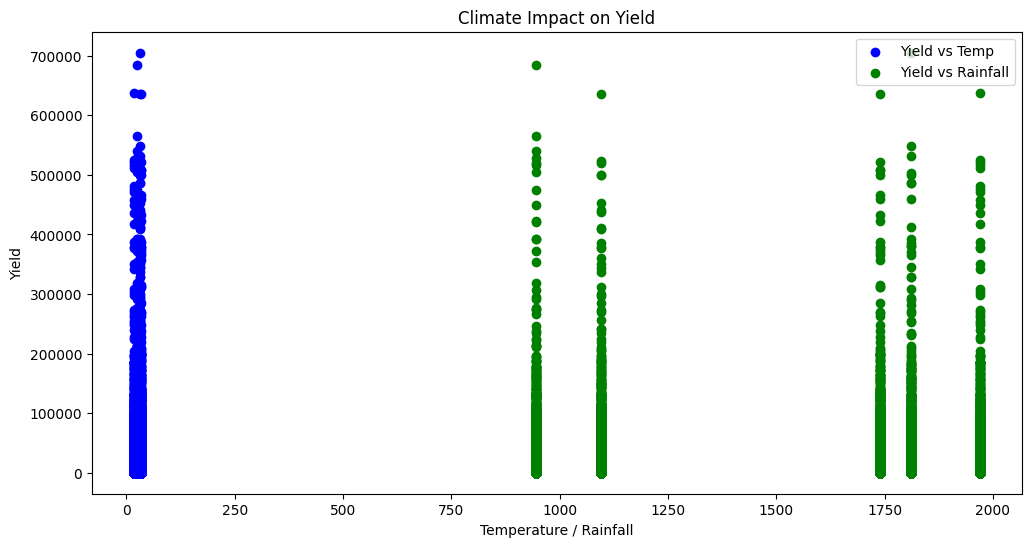

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df_yield['Temperature'], df_yield['Value'], label='Yield vs Temp', color='blue')
plt.scatter(df_yield['Rainfall'], df_yield['Value'], label='Yield vs Rainfall', color='green')
plt.xlabel("Temperature / Rainfall")
plt.ylabel("Yield")
plt.legend()
plt.title("Climate Impact on Yield")
plt.show()


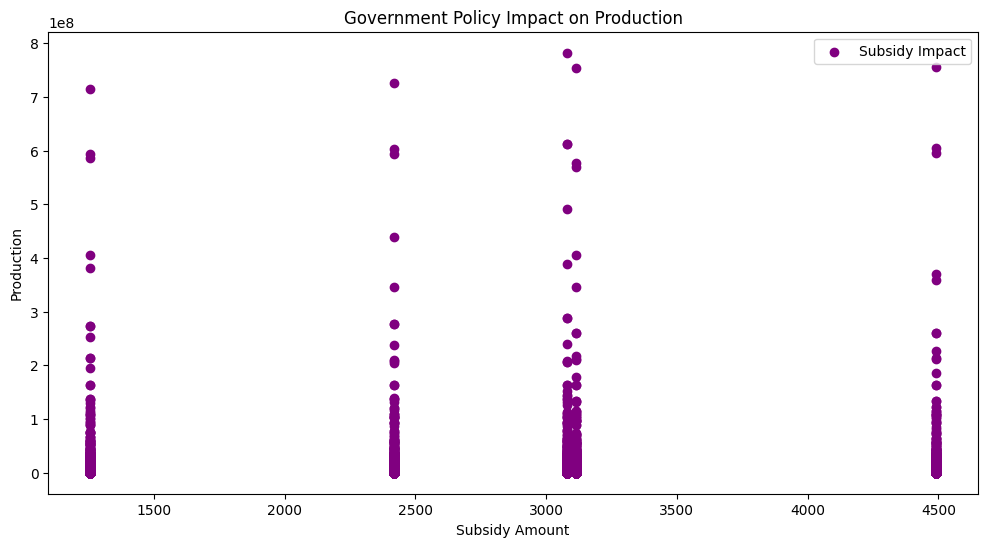

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter(df_production['Subsidy'], df_production['Value'], color='purple', label='Subsidy Impact')
plt.xlabel("Subsidy Amount")
plt.ylabel("Production")
plt.legend()
plt.title("Government Policy Impact on Production")
plt.show()


In [48]:
print(df.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')


In [49]:
print(df_yield.columns)  # Should include 'Year'
print(df_production.columns)
print(climate_data.columns)  # Should include 'Year'
print(policy_data.columns)


Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'z_score', 'Temperature',
       'Rainfall'],
      dtype='object')
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'z_score', 'Subsidy',
       'Regulations'],
      dtype='object')
Index(['Year', 'Temperature', 'Rainfall'], dtype='object')
Index(['Year', 'Subsidy', 'Regulations'], dtype='object')


In [50]:
df_yield['Year'] = df_yield['Year'].astype(int)
df_production['Year'] = df_production['Year'].astype(int)
climate_data['Year'] = climate_data['Year'].astype(int)
policy_data['Year'] = policy_data['Year'].astype(int)


In [51]:
df_yield = df_yield.merge(climate_data, on='Year', how='left')
df_production = df_production.merge(policy_data, on='Year', how='left')


In [52]:
df_yield = df_yield.loc[:, ~df_yield.columns.duplicated()]
df_production = df_production.loc[:, ~df_production.columns.duplicated()]


In [53]:
print(df_yield.columns)  # Should include 'Temperature', 'Rainfall'
print(df_production.columns)  # Should include 'Subsidy', 'Regulations'


Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'z_score', 'Temperature_x',
       'Rainfall_x', 'Temperature_y', 'Rainfall_y'],
      dtype='object')
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'z_score', 'Subsidy_x',
       'Regulations_x', 'Subsidy_y', 'Regulations_y'],
      dtype='object')


In [54]:
print(df_yield.isnull().sum())
print(df_production.isnull().sum())


Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
z_score             0
Temperature_x       0
Rainfall_x          0
Temperature_y       0
Rainfall_y          0
dtype: int64
Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
z_score             0
Subsidy_x           0
Regulations_x       0
Subsidy_y           0
Regulations_y       0
dtype: int64


In [55]:
# For df_yield (Keep 'Temperature_y' and 'Rainfall_y', drop 'Temperature_x' and 'Rainfall_x')
df_yield = df_yield.drop(columns=['Temperature_x', 'Rainfall_x']).rename(columns={'Temperature_y': 'Temperature', 'Rainfall_y': 'Rainfall'})

# For df_production (Keep 'Subsidy_y' and 'Regulations_y', drop 'Subsidy_x' and 'Regulations_x')
df_production = df_production.drop(columns=['Subsidy_x', 'Regulations_x']).rename(columns={'Subsidy_y': 'Subsidy', 'Regulations_y': 'Regulations'})

# Confirm the changes
print(df_yield.columns)  # Should now have 'Temperature' and 'Rainfall' correctly
print(df_production.columns)  # Should now have 'Subsidy' and 'Regulations' correctly


Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'z_score', 'Temperature',
       'Rainfall'],
      dtype='object')
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'z_score', 'Subsidy',
       'Regulations'],
      dtype='object')


In [56]:
# Remove duplicate columns from merging
df_yield = df_yield.drop(columns=['Temperature_x', 'Rainfall_x'], errors='ignore')
df_yield = df_yield.rename(columns={'Temperature_y': 'Temperature', 'Rainfall_y': 'Rainfall'})

df_production = df_production.drop(columns=['Subsidy_x', 'Regulations_x'], errors='ignore')
df_production = df_production.rename(columns={'Subsidy_y': 'Subsidy', 'Regulations_y': 'Regulations'})

# Verify the columns
print(df_yield.columns)  # Should include Temperature & Rainfall
print(df_production.columns)  # Should include Subsidy & Regulations


Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'z_score', 'Temperature',
       'Rainfall'],
      dtype='object')
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'z_score', 'Subsidy',
       'Regulations'],
      dtype='object')


In [58]:
# Merging df_yield and df_production on common columns
df_final = df_yield.merge(df_production, on=['Year', 'Area', 'Item'], how='inner')

# Display the first few rows to verify
print(df_final.head())


  Domain Code_x                      Domain_x  Area Code (M49)_x         Area  \
0           QCL  Crops and livestock products                  4  Afghanistan   
1           QCL  Crops and livestock products                  4  Afghanistan   
2           QCL  Crops and livestock products                  4  Afghanistan   
3           QCL  Crops and livestock products                  4  Afghanistan   
4           QCL  Crops and livestock products                  4  Afghanistan   

   Element Code_x Element_x Item Code (CPC)_x               Item  Year Code_x  \
0            5412     Yield              1371  Almonds, in shell         2019   
1            5412     Yield              1371  Almonds, in shell         2020   
2            5412     Yield              1371  Almonds, in shell         2021   
3            5412     Yield              1371  Almonds, in shell         2022   
4            5412     Yield              1371  Almonds, in shell         2023   

   Year  ... Item Code (CP

In [59]:
df_final.to_csv("final_crop_data.csv", index=False)
